In [1]:
import torch 

_ = torch.manual_seed(0) #set a manual seed to make it reproducible

num_dim = 3 #theta is 3 dimensoins
def simulator(theta): # creat a simulator where it takes some theta and adds some gaussian and +1 and adds gausian noise with std = 0.1
    return theta + 1.0 + torch.rand_like(theta) * 0.1

In [2]:
from sbi.utils import BoxUniform

prior = BoxUniform(low = -2 * torch.ones(num_dim), high =2 * torch.ones(num_dim))

#you create a distribution for your priot in a 4x4x4 cube centered at the origin 
#so theta (1,2,3) can be between -2 and 2

/opt/homebrew/Caskroom/miniconda/base/envs/sbi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sbi.inference import NPE
inference = NPE(prior=prior)
#NPE is algorithm of choice --> directly approximates posterior distribution
#Sets up where training data will be stored and sets an algorithm 
#untrained

In [4]:
num_simulations = 300
theta=prior.sample((num_simulations,))
x = simulator(theta)   
print('theta.shape', theta.shape)
print("x.shape ", x.shape)

#now you run the simulator 300 times productin 300 thetas and 300 x all of dim 3 
#this is your training data

theta.shape torch.Size([300, 3])
x.shape  torch.Size([300, 3])


In [ ]:
inference = inference.append_simulations(theta, x)
#assigns training data by feeding in inference object 


In [6]:
density_estimator = inference.train()
#actually training your nn
#the object density_estimatore contains a trained model 

 Neural network successfully converged after 308 epochs.

In [8]:
posterior = inference.build_posterior()
print(posterior)
#builds a posterior which is your "updated" prior
#allows you to geenrat possible theteas given some x


Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


inferring the posterior

In [ ]:
x_obs = torch.as_tensor([0.8, 0.6, 0.4])
#choose some observed x 

In [ ]:
samples = posterior.sample((100000,), x=x_obs)
#sample 100000 possible values for theta from the posterior 

100%|██████████| 100000/100000 [00:00<00:00, 221488.30it/s]


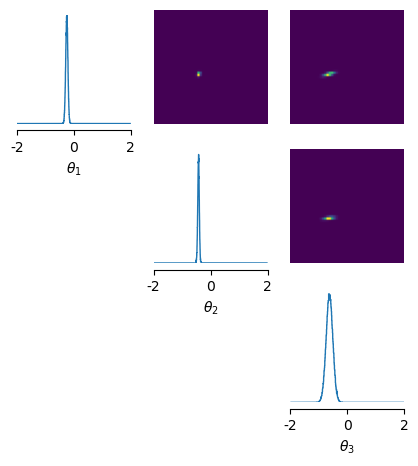

In [ ]:
from sbi.analysis import pairplot

_ = pairplot(
    samples,
    limits = [[-2,2], [-2,2], [-2,2]],
    figsize = (5,5),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"]



)

#histograms for theta (1,2,3)
#correlation is purple 
# circle means uncorrelated
# diagonal means some relationship

checking if we are correct

In [ ]:
theta_posterior = posterior.sample((10000,), x=x_obs)
x_predictive = simulator(theta_posterior)
#take your observed x and run it through the posterior to genreate many possible thetas
# pass the theta through the simulator to see what ACTUAL results they would product

100%|██████████| 10000/10000 [00:00<00:00, 182549.15it/s]


In [ ]:
print("posterior predictives", torch.mean(x_predictive, axis = 0))
print('observation:', x_obs)
# compare x observed and the x you got with your predicted theta

posterior predictives tensor([0.8021, 0.6246, 0.4212])
observation: tensor([0.8000, 0.6000, 0.4000])
